In [1]:
import numpy as np
import pandas as pd
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

# Emotion Detection
- It is a system through which various audio speech files are classified into different emotions such as happy, sad, anger and neutral by computers. Speech emotion recognition can be used in areas such as the medical field or customer call centers.
- In this kernel the emotions will be classified into only 2 categories: happy or sad

<img src='https://miro.medium.com/max/1185/1*6erovyvVqpraE2VR0f3vfw.jpeg'>

<div class='alert alert-info'><strong>Note: </strong>Here the emotion detection is being performed on the acoustic features of the data and not the semantic understanding of the sentences spoken by a person</div>

# Data Preparation
- Create a dataframe containing the meta data
- Create a list of all combinations given in the specification
- Filter out the data using these combinations
- Assign classes to each record (happy or sad)
- Assign gender class to each record so that it can be leveraged during analysis

In [2]:
records = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        records.append([filename, os.path.join(dirname,filename)])

data = pd.DataFrame(records, columns=['filename','path'])
data['actor'] = data['path'].apply(lambda x: re.findall("\w+_\d+",x)[0])
data = data[data['actor']!="audio_speech_actors_01"]
data.reset_index(inplace=True,drop=True)
data['type'] = data['filename'].apply(lambda x: re.split("-\d+\.wav",x)[0])
data

,filename,path,actor,type
0,03-01-08-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-08-01-01-01
1,03-01-01-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-01-01-01-01
2,03-01-07-02-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-07-02-01-02
3,03-01-07-01-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-07-01-01-02
4,03-01-01-01-02-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-01-01-02-01
...,...,...,...,...
1435,03-01-06-01-01-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-06-01-01-02
1436,03-01-05-01-02-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-05-01-02-02
1437,03-01-04-02-01-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-02-01-01
1438,03-01-07-02-02-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-07-02-02-02


## Number of Unique Speakers/Actors

In [3]:
data['actor'].nunique()

24

## Number of Audio files for each of the Speakers/Actors

In [4]:
data['actor'].value_counts()

Actor_02    60
Actor_17    60
Actor_18    60
Actor_13    60
Actor_03    60
Actor_14    60
Actor_09    60
Actor_10    60
Actor_19    60
Actor_04    60
Actor_22    60
Actor_24    60
Actor_23    60
Actor_12    60
Actor_06    60
Actor_15    60
Actor_08    60
Actor_20    60
Actor_11    60
Actor_01    60
Actor_21    60
Actor_16    60
Actor_05    60
Actor_07    60
Name: actor, dtype: int64

In [5]:
filter_list = []
for a in ["03","04"]:
    for b in ["01","02"]:
        for c in ["01","02"]:
            for d in ["01","02"]:
                filter_list.append(f"03-01-{a}-{b}-{c}-{d}")
                
data = data[data['type'].isin(filter_list)]
data.reset_index(inplace=True,drop=True)
data['class'] = data['type'].apply(lambda x: 'happy' if x.startswith('03-01-03') else 'sad')
data['gender'] = data['actor'].apply(lambda x: 'female' if int(x.split('_')[1])%2==0 else 'male')

In [6]:
data

,filename,path,actor,type,class,gender
0,03-01-04-01-02-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-04-01-02-01,sad,female
1,03-01-03-01-01-01-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-01-01-01,happy,female
2,03-01-03-01-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-01-01-02,happy,female
3,03-01-04-02-02-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-04-02-02-02,sad,female
4,03-01-03-02-01-02-02.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_02,03-01-03-02-01-02,happy,female
...,...,...,...,...,...,...
379,03-01-04-02-02-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-02-02-01,sad,male
380,03-01-04-01-01-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-04-01-01-01,sad,male
381,03-01-03-01-01-02-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-03-01-01-02,happy,male
382,03-01-03-01-02-01-07.wav,/kaggle/input/ravdess-emotional-speech-audio/A...,Actor_07,03-01-03-01-02-01,happy,male


## Number of Audio Files for Gender and Emotion Class

In [7]:
data['gender'].value_counts()

female    192
male      192
Name: gender, dtype: int64

In [8]:
data['class'].value_counts()

sad      192
happy    192
Name: class, dtype: int64

# Feature Extraction 
- The acoustic features of an audio can be extracted using different methods, but in this kernel only 2 methods will be used
1. MFCCs
2. Mel Spectrograms

<img src='https://images.deepai.org/converted-papers/2005.12779/x3.png'>

In [9]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
def feature_extraction(df, mfcc=True):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        x , sr = librosa.load(record['path'])
        mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
        mean_ms = np.mean(librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128),axis=1)
        features.append(mean_mfcc if mfcc else mean_ms)
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['class']
    return dataf

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

## MFCC Features

In [12]:
dataf = feature_extraction(data)
dataf

100%|██████████| 384/384 [01:59<00:00,  3.21it/s]


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-655.887451,44.384995,-5.922089,5.301328,-5.846109,-3.695551,-10.138599,-10.529056,-5.311738,-2.087161,...,0.516419,0.085295,0.505571,0.453406,0.520696,0.698611,0.274180,0.390192,0.463052,sad
1,-585.728638,44.487385,-22.599588,9.817188,-8.152647,-4.897211,-5.878748,-11.672596,-5.678558,-2.191390,...,0.119705,-0.098642,-0.040381,-0.069480,0.143877,0.309187,0.215850,0.184923,-0.039407,happy
2,-605.731567,46.535400,-19.348291,13.490911,-7.866285,-5.181213,-5.951238,-11.170672,-4.939478,-2.804853,...,0.041053,-0.128919,-0.220367,-0.167521,0.132136,-0.016883,-0.127417,0.468943,0.076724,happy
3,-661.506409,45.826687,-8.344815,6.547118,-6.763440,-5.770291,-13.880534,-12.418792,-10.221000,-1.434967,...,0.394012,-0.028128,-0.411090,0.139783,-0.099380,-0.056837,-0.021696,-0.091667,-0.078983,sad
4,-484.870270,37.232101,-32.120388,7.449310,-10.889060,-14.209931,-9.655680,-12.668373,-6.404204,-4.595531,...,0.083605,-0.307447,-0.368100,0.128967,0.459337,-0.001366,0.038329,0.208846,0.140713,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-568.361694,57.210964,0.689539,12.319594,6.551200,-0.579483,-16.130163,-6.567527,-11.981590,-4.644281,...,0.360626,0.436093,0.418931,0.527835,-0.141552,0.049041,0.278503,0.119281,0.330996,sad
380,-723.345276,73.582779,0.339823,12.872882,5.823831,-0.428393,-6.189919,-9.161605,-7.757164,-0.468081,...,-0.157852,0.274586,0.435817,0.400723,0.269498,0.262169,-0.085667,0.086253,0.102733,sad
381,-637.680298,78.848206,-7.289741,16.754477,6.813106,-4.355325,-9.541617,-7.217409,-0.118985,0.594490,...,0.124824,0.241637,0.051282,0.336582,0.019449,0.083065,0.025247,-0.009976,-0.082464,happy
382,-614.372986,73.964455,-10.224572,16.619707,6.027779,-0.498516,-12.134978,-9.038948,-1.969959,2.583837,...,0.138655,-0.109003,-0.038419,0.154577,-0.452695,0.194174,-0.015858,-0.433526,0.668562,happy


In [13]:
X1 = dataf.iloc[:,:-1].values
y1 = dataf.iloc[:,-1].values 
y1 = encoder.fit_transform(y1)

## Mel Spectrogram Features

In [14]:
dataf = feature_extraction(data,mfcc=False)
dataf

100%|██████████| 384/384 [01:56<00:00,  3.30it/s]


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,0.000006,0.000004,0.000007,0.000004,0.000004,0.000113,0.010259,0.098932,0.067486,0.040678,...,0.000055,0.000103,0.000051,0.000088,0.000059,0.000027,0.000010,5.699148e-07,1.328700e-08,sad
1,0.000010,0.000062,0.000121,0.000124,0.000140,0.002472,0.019177,0.073552,0.093589,0.154644,...,0.000048,0.000044,0.000041,0.000036,0.000020,0.000020,0.000008,5.696950e-07,1.192879e-08,happy
2,0.000015,0.000039,0.000191,0.000211,0.000450,0.001405,0.015066,0.073748,0.153525,0.073451,...,0.000050,0.000072,0.000047,0.000052,0.000026,0.000022,0.000005,4.933853e-07,6.702310e-09,happy
3,0.000001,0.000003,0.000018,0.000027,0.000068,0.000192,0.000435,0.001680,0.007180,0.101979,...,0.000110,0.000083,0.000171,0.000140,0.000173,0.000078,0.000018,6.620907e-07,7.958771e-09,sad
4,0.000100,0.000096,0.000092,0.000068,0.000046,0.000340,0.015523,0.228503,0.263276,0.121614,...,0.000364,0.000303,0.000181,0.000219,0.000268,0.000211,0.000069,1.035260e-05,1.570711e-07,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.584062,0.000854,0.000105,0.000018,0.000614,0.020639,0.083743,0.061423,0.052704,0.012844,...,0.000343,0.000377,0.000544,0.000408,0.000355,0.000266,0.000091,7.500727e-06,7.699103e-08,sad
380,0.000039,0.000011,0.000006,0.000412,0.007097,0.017221,0.015674,0.000889,0.000942,0.005823,...,0.000002,0.000002,0.000004,0.000006,0.000007,0.000007,0.000002,1.133628e-07,1.654082e-09,sad
381,0.000367,0.000086,0.002112,0.002465,0.024505,0.084531,0.065262,0.003117,0.001634,0.011607,...,0.000003,0.000007,0.000013,0.000012,0.000009,0.000005,0.000001,1.083808e-07,1.771896e-09,happy
382,0.000077,0.000044,0.000832,0.001446,0.004995,0.040185,0.114150,0.042320,0.021464,0.004327,...,0.000027,0.000035,0.000060,0.000048,0.000041,0.000023,0.000006,5.396259e-07,8.839143e-09,happy


In [15]:
X2 = dataf.iloc[:,:-1].values
y2 = dataf.iloc[:,-1].values
y2 = encoder.fit_transform(y2)

# Modelling
- The following models will be used for building the models for emotion detection
1. Logistic Regression on MFCC and Mel Spec Features
2. CNNs on MFCC and Mel Spec Features
3. Autoencoders and Variational Autoencoders on whichever features are giving better performance in the above models

## Logistic Regression

<img src='https://miro.medium.com/max/1400/1*Ba7LqnrsRnhjJyJl5LPW6Q.gif'>

In [16]:
def LogisticRegressionPipeline(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipeline = Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])
    pipeline.fit(X_train,y_train)
    y_train_pred = pipeline.predict(X_train)
    y_pred = pipeline.predict(X_test)
    
    cmatrix = confusion_matrix(y_test,y_pred)
    
    print("Training Performance")
    print(classification_report(y_train,y_train_pred))
    print("-----------------------------------------")
    print("Test Performance")
    print(classification_report(y_test,y_pred))
    print("-----------------------------------------")
    
    cv_score = cross_val_score(pipeline,X,y,cv=5)
    average = lambda x: sum(x)/len(x)
    print("5-Folds Scores: ", cv_score)
    print("-----------------------------------------")
    print("5-Folds Average Score: ",average(cv_score))
    
    return cv_score, cmatrix

## Logistic Regression: MFCCs

In [17]:
scores, cmatrix = LogisticRegressionPipeline(X1,y1)

Training Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       153
           1       0.99      0.98      0.98       154

    accuracy                           0.98       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.98      0.98      0.98       307

-----------------------------------------
Test Performance
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.86      0.79      0.82        38

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77

-----------------------------------------
5-Folds Scores:  [0.64935065 0.74025974 0.67532468 0.68831169 0.80263158]
-----------------------------------------
5-Folds Average Score:  0.7111756664388242


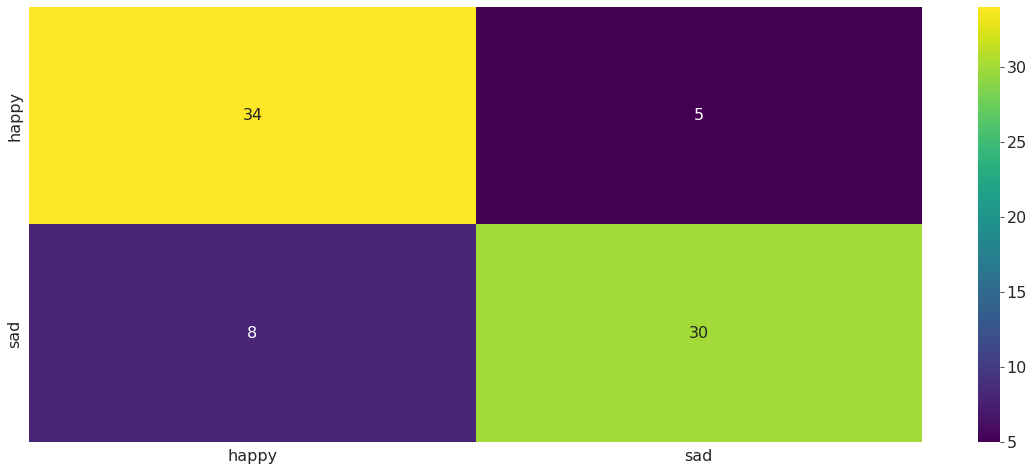

In [18]:
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

## Logistic Regression: Mel Spectrogram

In [19]:
scores, cmatrix = LogisticRegressionPipeline(X2,y2)

Training Performance
              precision    recall  f1-score   support

           0       0.89      0.66      0.75       154
           1       0.73      0.92      0.81       153

    accuracy                           0.79       307
   macro avg       0.81      0.79      0.78       307
weighted avg       0.81      0.79      0.78       307

-----------------------------------------
Test Performance
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.72      0.74      0.73        39

    accuracy                           0.73        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.73      0.73      0.73        77

-----------------------------------------
5-Folds Scores:  [0.67532468 0.74025974 0.67532468 0.72727273 0.71052632]
-----------------------------------------
5-Folds Average Score:  0.7057416267942583


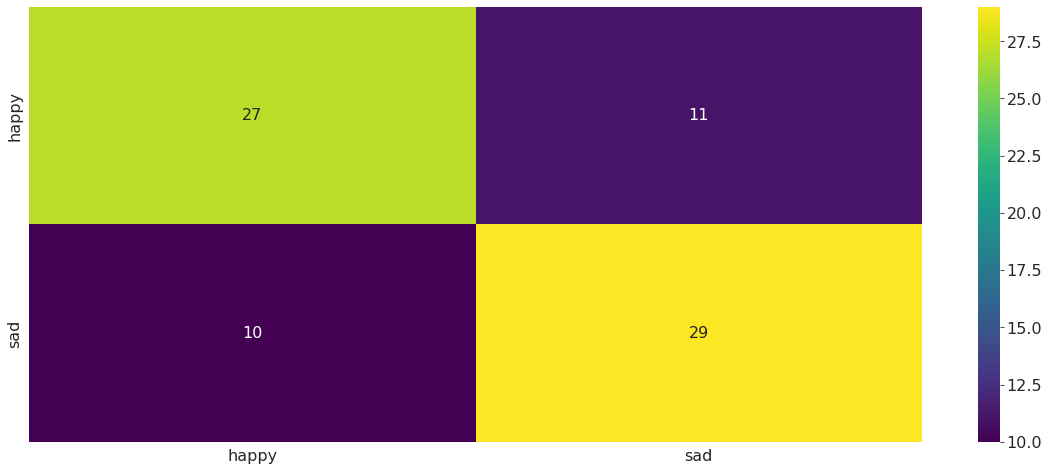

In [20]:
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

## CNNs (Convolutional Neural Networks)

<img src='https://miro.medium.com/max/1400/1*ciDgQEjViWLnCbmX-EeSrA.gif'>

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, InputLayer, UpSampling2D, Layer, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## CNNs: MFCCs

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

In [23]:
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 32)         320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

2022-10-25 06:32:36.168299: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [26]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50


2022-10-25 06:32:36.396061: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


10/10 [==============================] - 1s 36ms/step - loss: 3.0110 - accuracy: 0.5016 - val_loss: 1.6016 - val_accuracy: 0.4935

Epoch 00001: val_loss improved from inf to 1.60159, saving model to model.h5
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.1136 - accuracy: 0.4821 - val_loss: 0.6206 - val_accuracy: 0.6623

Epoch 00002: val_loss improved from 1.60159 to 0.62061, saving model to model.h5
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6785 - accuracy: 0.6026 - val_loss: 0.5779 - val_accuracy: 0.7143

Epoch 00003: val_loss improved from 0.62061 to 0.57786, saving model to model.h5
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6082 - accuracy: 0.6873 - val_loss: 0.5539 - val_accuracy: 0.7273

Epoch 00004: val_loss improved from 0.57786 to 0.55389, saving model to model.h5
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.5877 - accuracy: 0.6971 - val_loss: 0.5257 - val

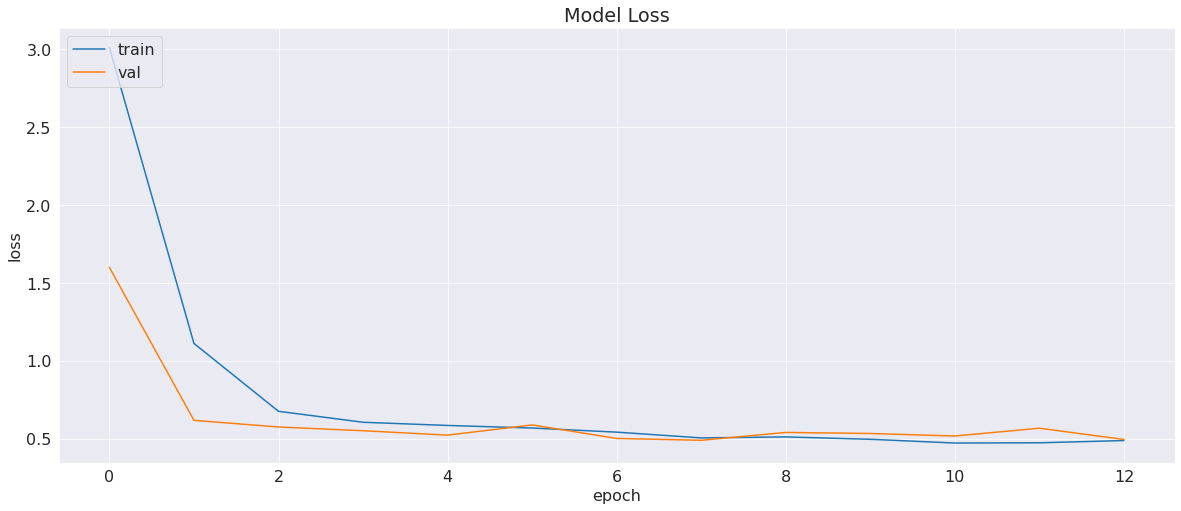

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
y_pred = model.predict(X_test)
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        38
           1       0.75      0.85      0.80        39

    accuracy                           0.78        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.78      0.78      0.78        77



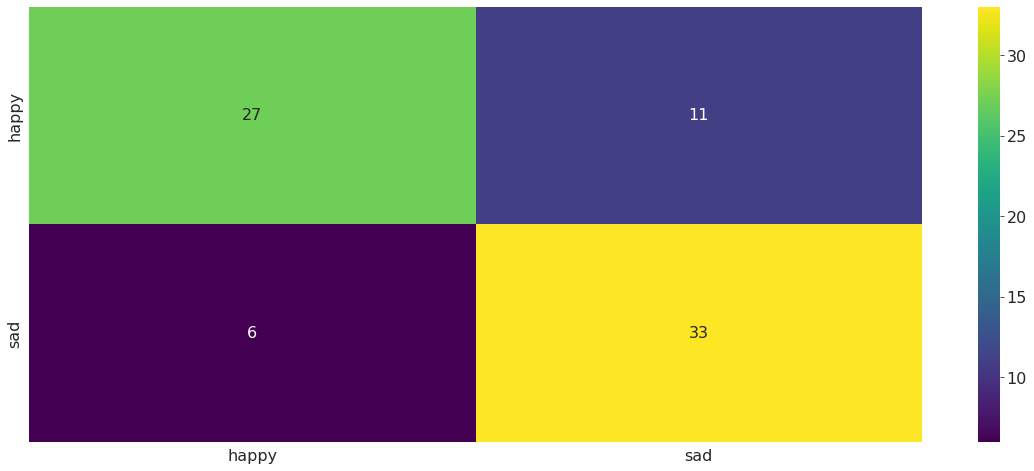

In [29]:
print(classification_report(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

## CNNs: Mel Spectrogram

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, stratify=y2)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

In [31]:
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 8, 32)         320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_name = "model_mel.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [33]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
10/10 [==============================] - 1s 31ms/step - loss: 0.6566 - accuracy: 0.5114 - val_loss: 0.6269 - val_accuracy: 0.6883

Epoch 00001: val_loss improved from inf to 0.62687, saving model to model_mel.h5
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6498 - accuracy: 0.6547 - val_loss: 0.6199 - val_accuracy: 0.7403

Epoch 00002: val_loss improved from 0.62687 to 0.61991, saving model to model_mel.h5
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6345 - accuracy: 0.7199 - val_loss: 0.6149 - val_accuracy: 0.7013

Epoch 00003: val_loss improved from 0.61991 to 0.61491, saving model to model_mel.h5
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6275 - accuracy: 0.7068 - val_loss: 0.6200 - val_accuracy: 0.7273

Epoch 00004: val_loss did not improve from 0.61491
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6168 - accuracy: 0.7003 - val_loss: 0.5996 - val_accura

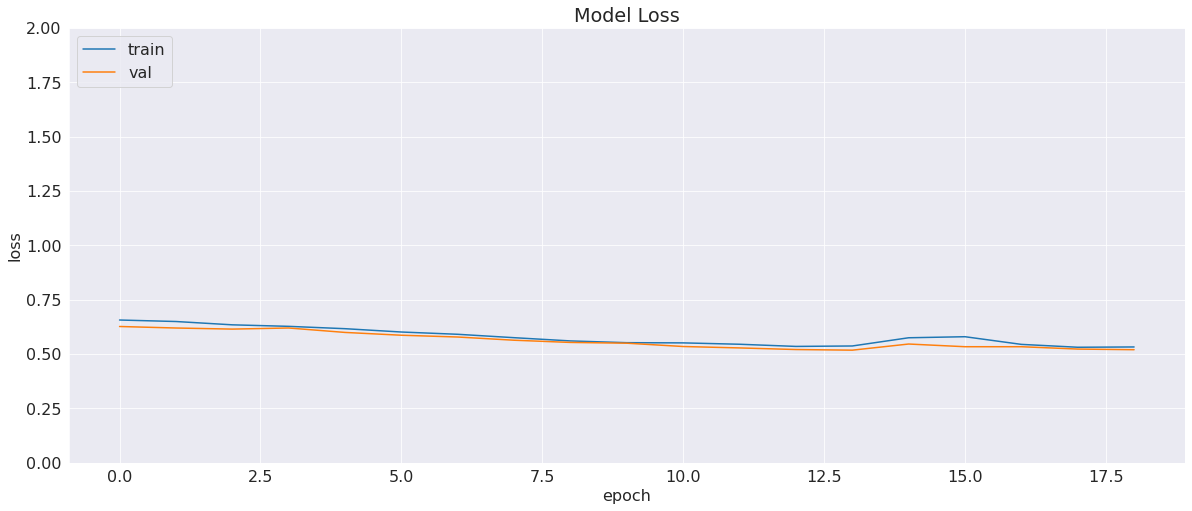

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,2])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       0.55      0.47      0.51        38
           1       0.55      0.62      0.58        39

    accuracy                           0.55        77
   macro avg       0.55      0.54      0.54        77
weighted avg       0.55      0.55      0.54        77



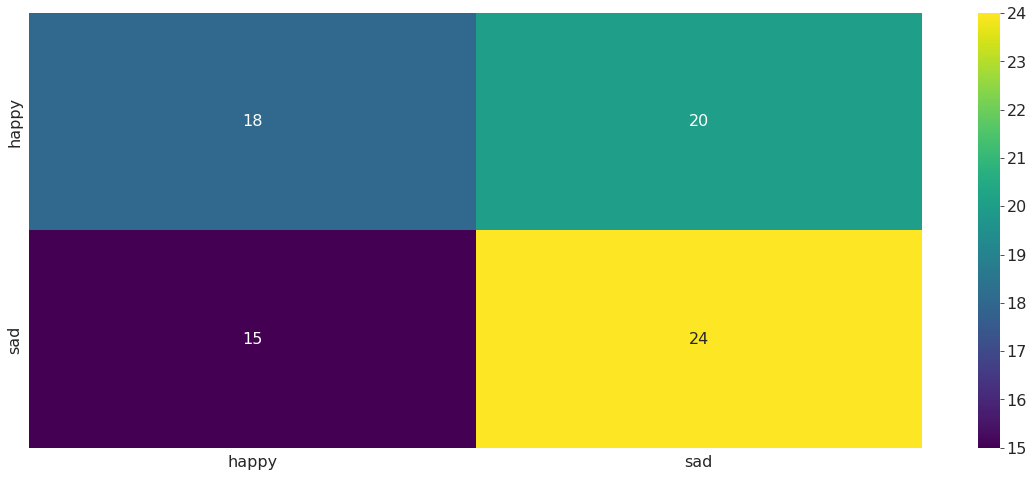

In [35]:
print(classification_report(y_test,y_pred))
cmatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cmatrix,annot=True,fmt='.3g',cmap='viridis',xticklabels=['happy','sad'],yticklabels=['happy','sad'])
plt.show()

**Inference:** MFCC Features give better performance

## Autoencoders
<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png'>

In [36]:
dataf = feature_extraction(data)
dataf

100%|██████████| 384/384 [02:07<00:00,  3.01it/s]


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-655.887451,44.384995,-5.922089,5.301328,-5.846109,-3.695551,-10.138599,-10.529056,-5.311738,-2.087161,...,0.516419,0.085295,0.505571,0.453406,0.520696,0.698611,0.274180,0.390192,0.463052,sad
1,-585.728638,44.487385,-22.599588,9.817188,-8.152647,-4.897211,-5.878748,-11.672596,-5.678558,-2.191390,...,0.119705,-0.098642,-0.040381,-0.069480,0.143877,0.309187,0.215850,0.184923,-0.039407,happy
2,-605.731567,46.535400,-19.348291,13.490911,-7.866285,-5.181213,-5.951238,-11.170672,-4.939478,-2.804853,...,0.041053,-0.128919,-0.220367,-0.167521,0.132136,-0.016883,-0.127417,0.468943,0.076724,happy
3,-661.506409,45.826687,-8.344815,6.547118,-6.763440,-5.770291,-13.880534,-12.418792,-10.221000,-1.434967,...,0.394012,-0.028128,-0.411090,0.139783,-0.099380,-0.056837,-0.021696,-0.091667,-0.078983,sad
4,-484.870270,37.232101,-32.120388,7.449310,-10.889060,-14.209931,-9.655680,-12.668373,-6.404204,-4.595531,...,0.083605,-0.307447,-0.368100,0.128967,0.459337,-0.001366,0.038329,0.208846,0.140713,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-568.361694,57.210964,0.689539,12.319594,6.551200,-0.579483,-16.130163,-6.567527,-11.981590,-4.644281,...,0.360626,0.436093,0.418931,0.527835,-0.141552,0.049041,0.278503,0.119281,0.330996,sad
380,-723.345276,73.582779,0.339823,12.872882,5.823831,-0.428393,-6.189919,-9.161605,-7.757164,-0.468081,...,-0.157852,0.274586,0.435817,0.400723,0.269498,0.262169,-0.085667,0.086253,0.102733,sad
381,-637.680298,78.848206,-7.289741,16.754477,6.813106,-4.355325,-9.541617,-7.217409,-0.118985,0.594490,...,0.124824,0.241637,0.051282,0.336582,0.019449,0.083065,0.025247,-0.009976,-0.082464,happy
382,-614.372986,73.964455,-10.224572,16.619707,6.027779,-0.498516,-12.134978,-9.038948,-1.969959,2.583837,...,0.138655,-0.109003,-0.038419,0.154577,-0.452695,0.194174,-0.015858,-0.433526,0.668562,happy


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [38]:
X_happy = dataf[dataf['class']=='happy'].iloc[:,:-1].values 
X_sad = dataf[dataf['class']=='sad'].iloc[:,:-1].values 

X_happy = scaler.fit_transform(X_happy)
X_sad = scaler.transform(X_sad)

X_happy = X_happy.reshape(-1,16,8,1)
X_sad = X_sad.reshape(-1,16,8,1)

In [39]:
model = Sequential([
    Input(shape=(16,8,1)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')
])

model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 8, 32)         320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 2, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 2, 64)          36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 4, 32)         

In [41]:
history = model.fit(X_happy,X_happy,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 11ms/step - loss: 0.0389
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0372
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0361
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0351
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0339
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0315
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0286
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0259
Epoch 12/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0252
Epoch 13/100
6/6 [==============================]

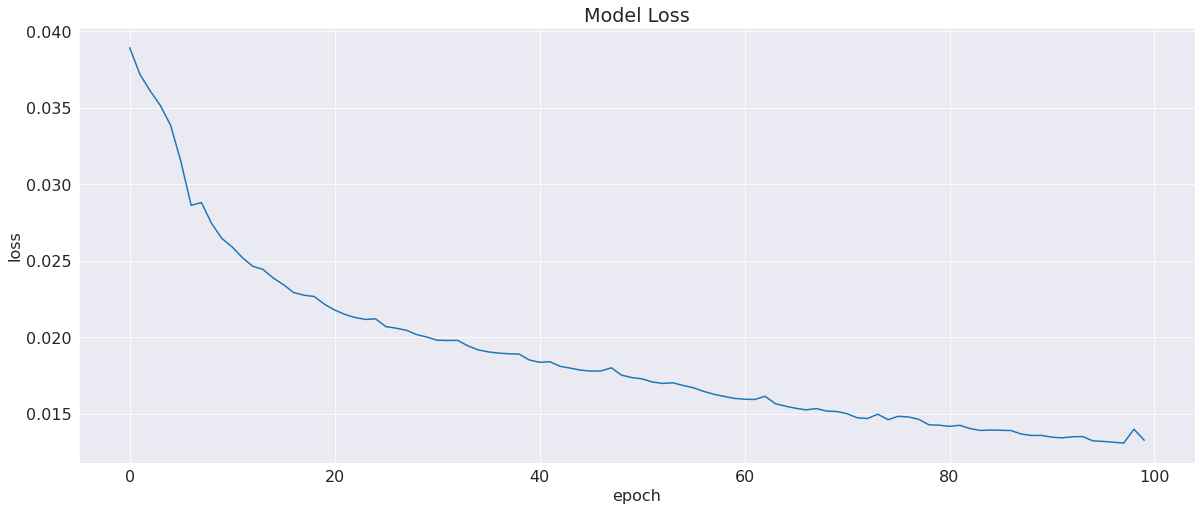

In [42]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [43]:
model.evaluate(X_happy,X_happy)

6/6 [==============================] - 0s 4ms/step - loss: 0.0130


0.013019262813031673

In [44]:
model.evaluate(X_sad,X_sad)

6/6 [==============================] - 0s 4ms/step - loss: 0.0172


0.01724436692893505

**Inference:** There is not a significant difference between the loss for happy audios and sad audios

## Variational Autoencoders
<img src='https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-18-at-12.24.19-AM.png'>

In [45]:
class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [46]:
input_layer = Input(shape=(16,8,1))
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(2,2)(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
z_mean = Dense(128, name="z_mean")(x)
z_log_var = Dense(128, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
x = Dense(4*2*64, activation="relu")(z)
x = Reshape((4, 2, 64))(x)
x = UpSampling2D()(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
output = Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(x)

model = Model(inputs=input_layer,outputs=output)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 16, 8, 1)]   0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 16, 8, 32)    320         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 8, 4, 32)     0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 8, 4, 64)     18496       max_pooling2d_6[0][0]            
______________________________________________________________________________________________

In [47]:
history = model.fit(X_happy,X_happy,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 18ms/step - loss: 0.0448
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0380
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0371
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0364
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0358
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0350
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0345
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0340
Epoch 9/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0336
Epoch 10/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0333
Epoch 11/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0329
Epoch 12/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0325
Epoch 13/100
6/6 [==============================]

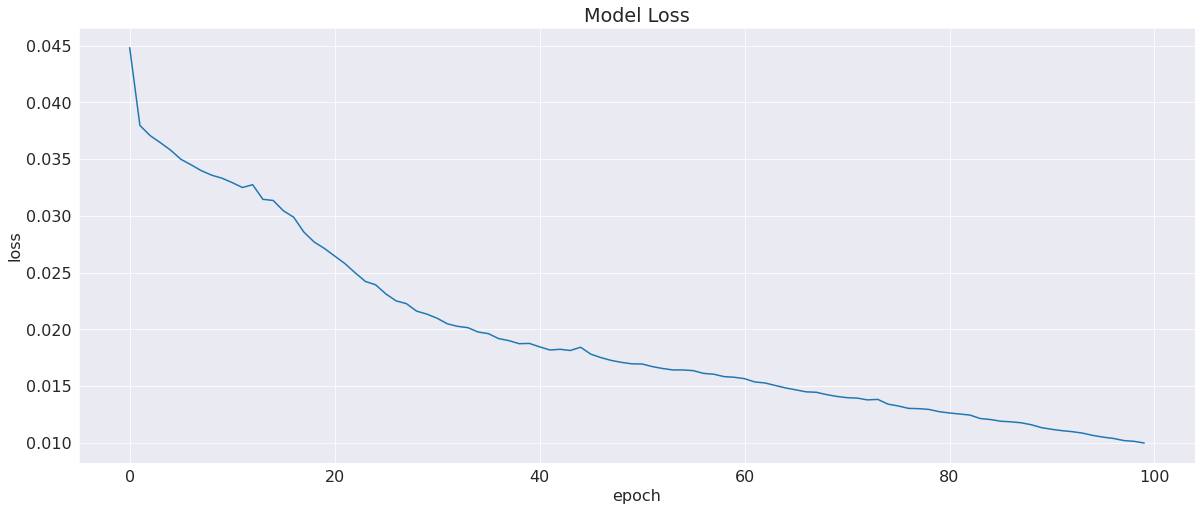

In [48]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [49]:
model.evaluate(X_happy,X_happy)

6/6 [==============================] - 0s 7ms/step - loss: 0.0098


0.009782803244888783

In [50]:
model.evaluate(X_sad,X_sad)

6/6 [==============================] - 0s 7ms/step - loss: 0.0222


0.022210076451301575

**Inference:** There is a significant difference between the loss of happy and sad audios

In [51]:
X_sc = np.vstack([X_happy,X_sad])
y = np.hstack([np.ones((192,)),np.zeros((192,))])

In [52]:
var_encoder = Model(inputs=model.input,outputs=model.layers[6].output)
var_encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16, 8, 1)]        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 8, 32)         320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
z_mean (Dense)               (None, 128)               6566

In [53]:
z_mean = var_encoder.predict(X_sc)

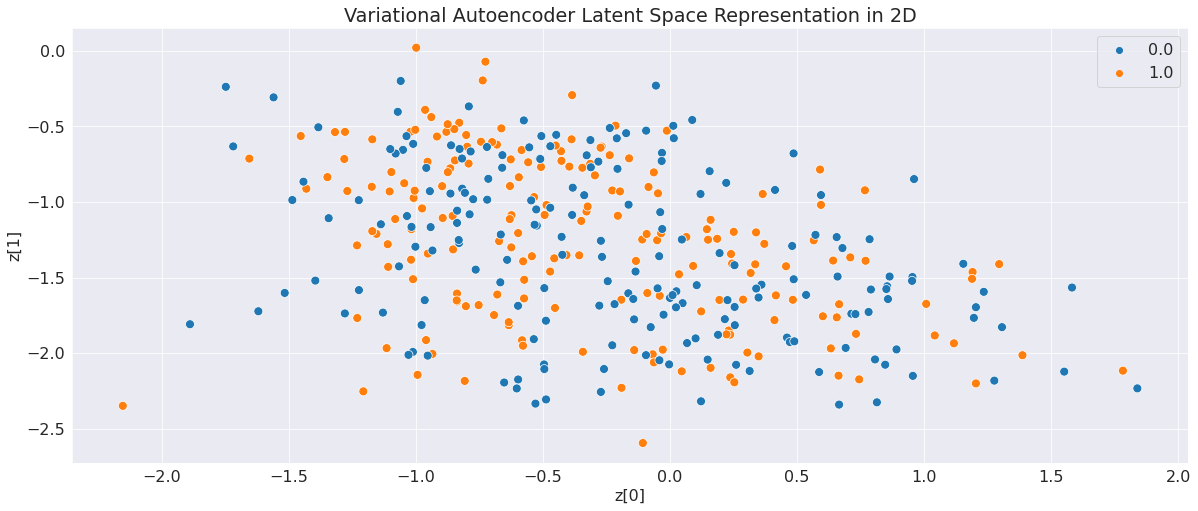

In [55]:
sns.scatterplot(z_mean[:, 0], z_mean[:, 1], hue=y, s=80)
plt.title("Variational Autoencoder Latent Space Representation in 2D")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

<div class='alert alert-success'><strong>Conclusion:</strong>
    <li><strong>Logistic Regression</strong> model performs well with the MFCC Features with a decent classifcation accuracy and F1-score</li>
    <li><strong>CNNs</strong> perform well on the MFCC Features as well, therefore for autoencoders only MFCCs are taken as features</li>
    <li><strong>Variational Autoencoders</strong> perform a better job in terms of reconstruction loss than the regular autoencoders as they are able to model the distribution of happy audios in <strong>128-Dimensional latent space</strong></li>
</div>